# Proyecto Final de Aprendizaje Automático

---

## Entrenamiento del Modelo 2

**Autor**: Andrés Gil Vicente  
**Fecha de entrega**: 04/05/2025  

---

### Objetivos:

Este fichero tiene como objetivo principal realizar el entrenamiento del **Modelo 2**, utilizando las variables disponibles en el dataset de entrenamiento (`df_train.csv`), exceptuando las variables **`T1`** y **`T2`**, que no podrán ser empleadas para predecir la variable objetivo **`T3`**.

A lo largo de este proceso, se harán distintas pruebas con diferentes modelos, para determinar cuál es el que ofrece mejor rendimiento a la hora de hacer predicciones sobre datos que no se han utilizado para entrenarlo (`df_val.csv`). Con cada modelo se realizarán las siguientes tareas:

1. **Entrenamiento del modelo**: Ajuste del modelo utilizando el conjunto de datos de train, excluyendo las variables **`T1`** y **`T2`**.

2. **Predicción del modelo**: Se tratará de hacer predicciones sobre el conjunto de datos de validación.

3. **Evaluación del modelo**: Validación del rendimiento del modelo mediante métricas como precisión, R2, F1-score, MSE, etc.

4. **Optimización del modelo**: Ajuste de hiperparámetros, validación cruzada, si es necesario, para mejorar el rendimiento del modelo. 

5. **Conclusiones y análisis sobre el modelo**: Se analizarán las métricas de performance que ha proporcionado el modelo para las predicciones realizadas, evaluando de este modo si es una buena opción dicho modelo, o si es mejor buscar otras alternativas.

---

### Resultados:

Tras la experimentación con distintos modelos de aprendizaje, se llegará a una conclusión basada en las métricas y estadísticas obtenidas acerca del rendimiento de cada modelo. De este modo se decidirá cuál es el modelo que mejor se adapta a nuestras necesidades, y que por tanto vamos a emplear para predecir las notas (**`T3`**) del conjunto de test, recordemos, sin contar con la información de T1 ni T2.

--- 

### Exploración adicional:

Además de buscar una precisión alta en nuestras predicciones, profundizaremos en nuestro análisis empleando técnicas de aprendizaje no supervisado como **PCA** y **Clustering**. De este modo, trataremos de encontrar patrones en los datos y relaciones interesantes que nos permitan enriquecer nuestro informe sobre los factores que se podrían mejorar en el ámbito educativo para que los alumnos consigan calificaciones más altas.


### Importamos las librerías necesarias:

In [1]:
from funciones import*

### Cargamos los ficheros de datos:

In [2]:
# Cargamos los ficheros con todas las columnas de información
carpeta_datos = "processed_data"
df_train = pd.read_csv(f"{carpeta_datos}/df_train.csv", delimiter=",")
df_val = pd.read_csv(f"{carpeta_datos}/df_val.csv", delimiter=",")

# Eliminamos las columnas T1 y T2
df_train = df_train.drop(columns=['T1', 'T2'])
df_val = df_val.drop(columns=['T1', 'T2'])

# Mostramos las primeras filas del conjunto de datos de train
df_train.head()

,edad,Medu,Pedu,TiempoViaje,TiempoEstudio,suspensos,RelFam,TiempoLib,SalAm,AlcSem,...,tutor_padre,apoyo_si,ApFam_si,academia_si,extras_si,enfermeria_si,EstSup_si,internet_si,pareja_si,asignatura_M
0,1.057377,-0.628666,-0.345235,0.654526,0.044967,1.128366,1.164430,1.758693,1.654019,-0.519106,...,0,0,0,0,0,1,0,1,1,0
1,1.057377,1.207038,1.574930,-0.745632,0.044967,-0.414879,1.164430,0.806815,-0.083296,-0.519106,...,0,0,1,1,1,1,1,1,0,1
2,0.217230,-0.628666,-0.345235,-0.745632,0.044967,-0.414879,0.085022,-1.096942,-0.951953,-0.519106,...,0,0,1,0,0,1,1,0,1,1
3,-0.622918,0.289186,0.614848,0.654526,-1.148696,-0.414879,1.164430,0.806815,-0.951953,-0.519106,...,1,0,0,0,1,1,1,1,0,1
4,-1.463065,0.289186,1.574930,-0.745632,0.044967,-0.414879,1.164430,1.758693,-1.820610,-0.519106,...,0,0,1,0,1,1,1,1,0,0


Definimos cuáles van a ser las `x` y las `y`, para entrenar a nuestro modelo, así como para los datos de validación:

In [3]:
# Definimos cuál es nuestro target para predecir
variable_objetivo = "T3"

# Separamos en x e y
x_train = df_train[[var for var in df_train.columns if var != variable_objetivo]].to_numpy()
y_train = df_train[variable_objetivo].to_numpy()

# Lo mismo para el conjunto de validación
x_val = df_val[[var for var in df_val.columns if var != variable_objetivo]].to_numpy()
y_val = df_val[variable_objetivo].to_numpy()

### Primer Approach - Random Forest

Primeramente, vamos a hacer K-FOLD cross validation, para ver qué configuración de hiperparámetros de Random Forest es la que proprociona de media una mejor predicción, basándonos en la métrica de R2 para este proceso. Utilizaremos tan solo el conjunto de train, dividiéndolo a su vez en train y validation, con distintas distribuciones de datos para cada fold que usemos. 

Una vez tengamos la configuración óptima, evaluaremos elrendimiento del modelo en el conjunto de validación. 

Para comenzar a probar, ponemos unos posibles valores de los hiperparámetros: número de árboles que tendrá nuestro bosque, máximo de features que usará cada árbol y máximo de muestra del dataset que tomará dicho árbol.


In [4]:
# Valores de prueba iniciales
n_trees_values = [10, 20, 30]
max_feats_values = [0.6, 0.7, 0.8]
max_samples_values = [0.7, 0.9, 1.0]

# Obtenemos la media de r2 y la desviación típica, para cada combinación de valores que me da una posible configuración
resultados = cross_validation_random_forest(
    X=df_train, nFolds=5, 
    n_trees_values = n_trees_values, max_feats_values = max_feats_values, max_samples_values = max_samples_values
)


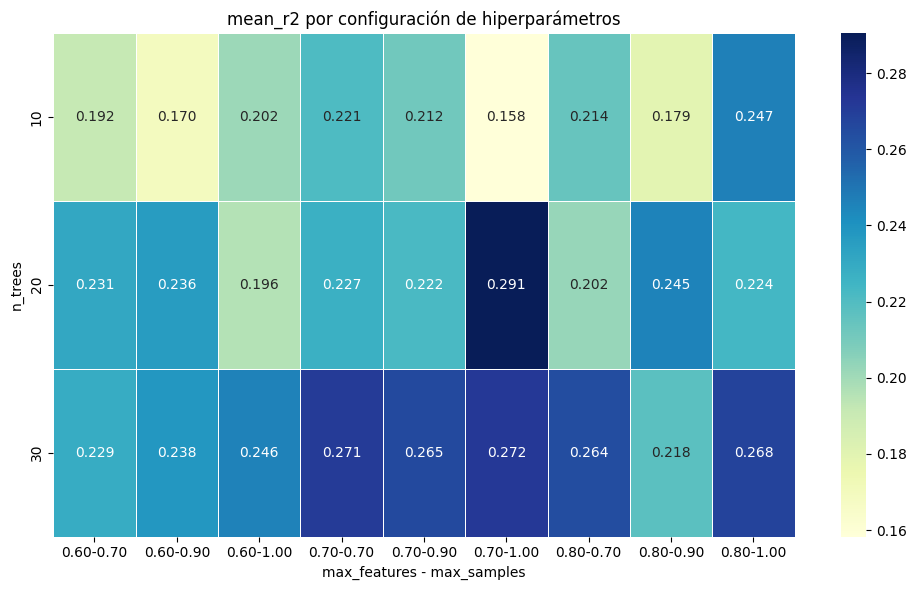

In [5]:
# Mostramos un heatmap para ver qué combinaciones de hiperparámetros son las mejores
plot_resultados_modelo(
    resultados=resultados,
    fila='n_trees',
    columna=['max_features', 'max_samples'],
    nombres_params=['n_trees', 'max_features', 'max_samples']
)


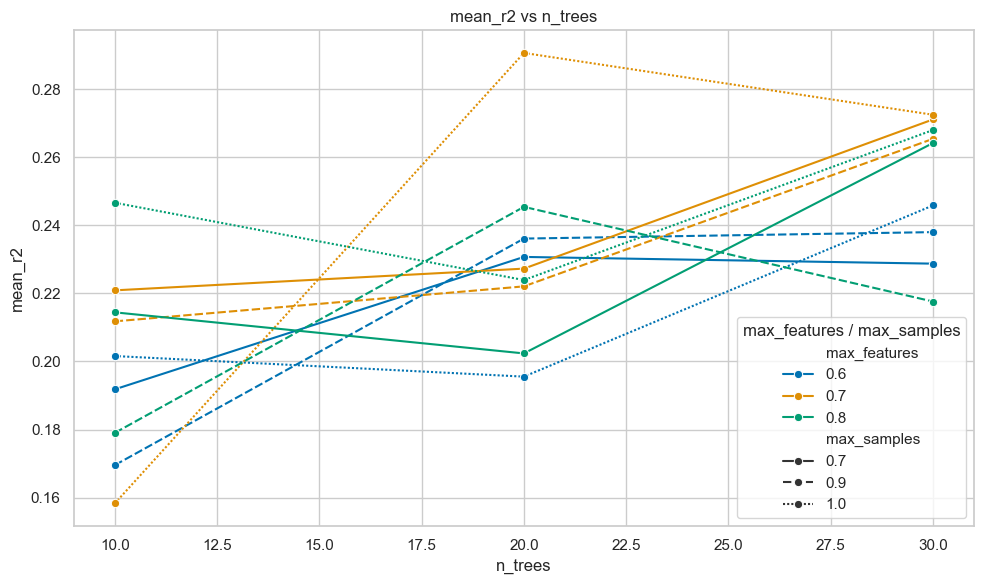

In [6]:
# Vemos otra forma de representar cómo cambia el R2 medio, en función de los 3 hiperparámetros y sus combinaciones
plot_metric_evolution(
    resultados=resultados,
    eje_x='n_trees',
    hue='max_features',
    style='max_samples',
    nombres_params=['n_trees', 'max_features', 'max_samples']
)

#### Resultados de la búsqueda de hiperparámetros

Tras realizar numerosas pruebas con diferentes combinaciones de hiperparámetros, hemos identificado los siguientes intervalos como los más prometedores para maximizar el R², teniendo en cuenta el equilibrio entre rendimiento y coste computacional:

- **Número de árboles (`n_estimators`)**: [250, 275, 300]
- **Máximo de características por árbol (`max_features`)**: [0.6, 0.7, 0.8]
- **Máximo de muestras por árbol (`max_samples`)**: [0.7, 0.9, 1.0]

Estos valores representan un rango acotado donde se encuentra la mejor combinación de parámetros. A continuación, se detalla el enfoque seguido:

1. **Optimización iterativa**:
    - Primero, se fija un valor inicial para `n_estimators` y se exploran diferentes combinaciones de `max_features` y `max_samples`.
    - Una vez identificado el mejor valor para `n_estimators`, este se fija, y se continúa ajustando los otros hiperparámetros.
    - Este proceso se repite hasta encontrar la configuración óptima.

2. **Resultados preliminares**:
    - Los valores obtenidos para las combinaciones probadas se almacenaron en un diccionario, donde cada clave representa una combinación de hiperparámetros y su valor asociado es una tupla con el R² medio y su desviación estándar.

3. **Ejemplo de resultados**:
    - `(250, 0.6, 0.7)`: R² medio = 0.2645, desviación estándar = 0.0559
    - `(300, 0.7, 1.0)`: R² medio = 0.2883, desviación estándar = 0.0618

A medida que avanzamos, seguimos refinando los valores para encontrar la configuración óptima que maximice el rendimiento del modelo.



In [7]:
# Hiperparámetros más interesantes de explorar
n_trees_values = [250, 275, 300]
max_feats_values = [0.6, 0.7, 0.8]
max_samples_values = [0.7, 0.8, 0.9]

# Obtenemos la media de R2 y la desviación típica, para cada combinación de valores que me da una posible configuración
resultados = cross_validation_random_forest(
    X=df_train, nFolds=5, 
    n_trees_values = n_trees_values, max_feats_values = max_feats_values, max_samples_values = max_samples_values
)

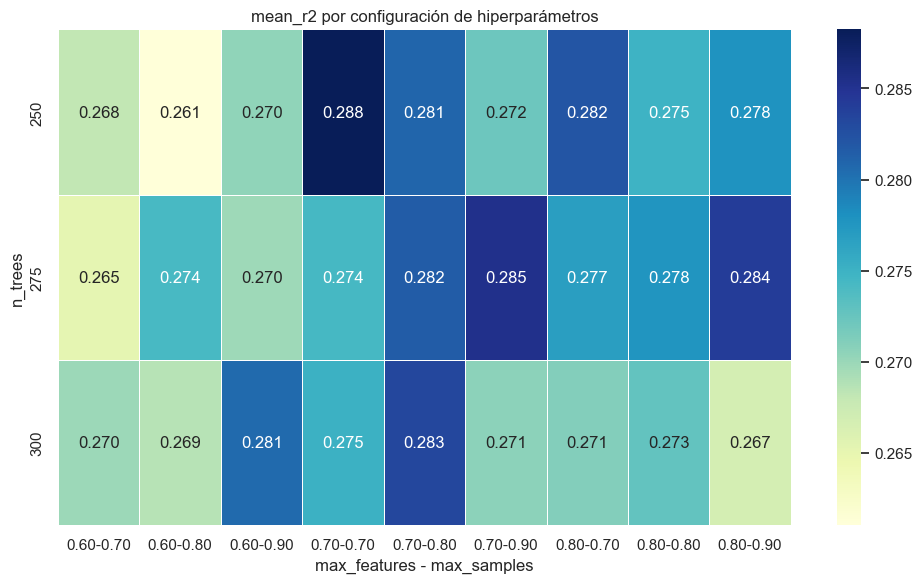

In [8]:
# Mostramos un heatmap para ver qué combinaciones de hiperparámetros son las mejores
plot_resultados_modelo(
    resultados=resultados,
    fila='n_trees',
    columna=['max_features', 'max_samples'],
    nombres_params=['n_trees', 'max_features', 'max_samples']
)

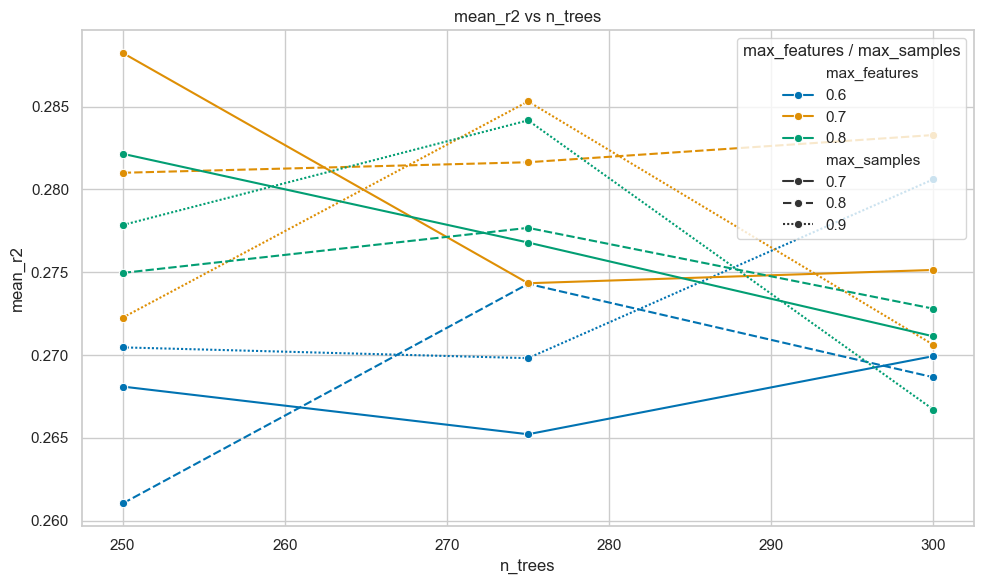

In [9]:
# Vemos otra forma de representar cómo cambia el R2 medio, en función de los 3 hiperparámetros y sus combinaciones
plot_metric_evolution(
    resultados=resultados,
    eje_x='n_trees',
    hue='max_features',
    style='max_samples',
    nombres_params=['n_trees', 'max_features', 'max_samples']
)

#### Análisis de la validación cruzada

Tras numerosas pruebas e iteraciones, hemos identificado un punto clave donde el R² deja de crecer y comienza a decrecer. Este punto es especialmente interesante, ya que indica una configuración óptima de hiperparámetros.

La mejor configuración encontrada es la siguiente:
- **Número de árboles (`n_estimators`)**: 275
- **Proporción de características por árbol (`max_features`)**: 0.8
- **Proporción de muestras por árbol (`max_samples`)**: 0.7

Aunque existen otras configuraciones que también ofrecen un R² elevado, hemos optado por esta debido a que utiliza un menor número de árboles. Esto proporciona varias ventajas:
- **Mayor robustez**: Reduce la posibilidad de sobreajuste.
- **Menor complejidad**: Disminuye el coste computacional.
- **Mejor generalización**: Favorece un modelo más interpretable y eficiente.

Con esta configuración, procedemos a evaluar el rendimiento del modelo en el conjunto de validación y analizar sus métricas.

In [10]:
# Parámetros del bosque
n_estimators = 275
max_features = 0.8
max_samples = 0.7

# Separación explícita de variables predictoras y objetivo
target_col = "T3"
X_train = df_train.drop(columns=[target_col])
y_train = df_train[target_col]

X_val = df_val.drop(columns=[target_col])
y_val = df_val[target_col]

# Lista donde vamos a ir guardando nuestras predicciones, el voto de cada árbol del bosque
predictions = []

# Creamos tantos modelos y predicciones, como el número de árboles hemos definido
for _ in range(n_estimators):
    
    # Bootstrap: muestreo de filas
    sample_indices = np.random.choice(X_train.index, size=int(len(X_train)*max_samples), replace=True)
    X_bootstrap = X_train.loc[sample_indices]
    y_bootstrap = y_train.loc[sample_indices]

    # Selección aleatoria de variables (sin reemplazo)
    feature_indices = np.random.choice(X_train.columns, size=int(X_train.shape[1]*max_features), replace=False)
    X_bootstrap_subset = X_bootstrap[feature_indices]
    X_val_subset = X_val[feature_indices]

    # Entrenamiento del árbol
    tree = DecisionTreeRegressor()  # Sin restricciones
    tree.fit(X_bootstrap_subset, y_bootstrap)

    # Predicción sobre validación
    y_pred = tree.predict(X_val_subset)
    predictions.append(y_pred)

# Promediamos las predicciones (voto por promedio)
predicciones_rf = np.mean(predictions, axis=0)

In [11]:
# Evaluamos y mostramos los resultados
performance = evaluate_regression(y_val, predicciones_rf)

Evaluación del modelo de regresión:
MAE  (Error Absoluto Medio): 2.259
MSE  (Error Cuadrático Medio): 9.877
RMSE (Raíz del MSE): 3.143
R²   (Coef. de determinación): 0.384


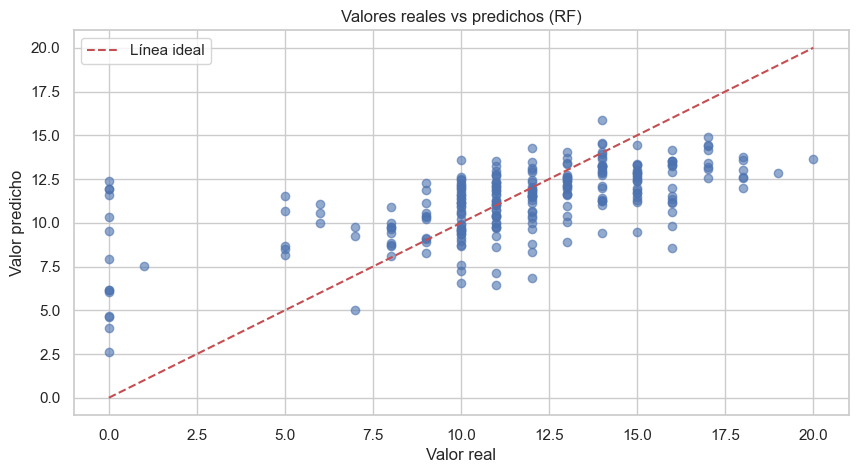

In [12]:
# Graficamos la relación entre los valores reales y las predicciones
plot_real_vs_pred(y_val, predicciones_rf,  "Valores reales vs predichos (RF)")

### Análisis del Rendimiento del Random Forest Óptimo

Tras ajustar el modelo de Random Forest con los hiperparámetros óptimos obtenidos mediante validación cruzada, se han evaluado las predicciones realizadas sobre el conjunto de validación. A continuación, se presentan los resultados y un análisis detallado:

##### Hiperparámetros utilizados:
- **Número de árboles (`n_estimators`)**: 275
- **Proporción de características por árbol (`max_features`)**: 0.8
- **Proporción de muestras por árbol (`max_samples`)**: 0.7

##### Métricas de rendimiento obtenidas:
- **Coeficiente de determinación (R²)**: 0.381 
    Esto indica que el modelo explica casi el 40% de la variabilidad de la variable objetivo en el conjunto de validación. Aunque no es un valor extremadamente alto, sugiere que el modelo tiene cierta capacidad predictiva, pero podría mejorarse.
    
- **Error cuadrático medio (MSE)**: 9.9603  
    Representa el promedio de los errores al cuadrado entre los valores reales y las predicciones. Un valor más bajo indica un mejor ajuste.

- **Raíz del error cuadrático medio (RMSE)**: 3.1560  
    Es la raíz cuadrada del MSE y tiene la misma unidad que la variable objetivo. En este caso, el error promedio de las predicciones es de aproximadamente 3.16 puntos en la escala de calificaciones.

- **Error absoluto medio (MAE)**: 2.2722  
    Indica que, en promedio, las predicciones del modelo se desvían en 2.27 puntos de las calificaciones reales.

##### Características del modelo:
1. **Capacidad predictiva moderada**:  
     El valor de R² sugiere que el modelo tiene una capacidad predictiva limitada. Esto podría deberse a la complejidad de la relación entre las variables predictoras y la variable objetivo, o a la presencia de ruido en los datos. Si recordamos el modelo1, nos damos cuenta de que claramente las variables T1 y T2 nos proporcionaban una valiosa información que ahora no tenemos.

2. **Errores aceptables**:  
     Tanto el RMSE como el MAE indican que los errores de predicción son razonables, aunque hay margen para mejorar. El MAE, en particular, muestra que las predicciones no suelen estar tan lejos de los valores reales.

3. **Posibles mejoras**:  
     - **Ajuste de hiperparámetros**: Aunque los valores actuales son prometedores, podría explorarse un rango más amplio de hiperparámetros para intentar mejorar el rendimiento. También podríamos emplear más árboles para construir el bosque, aumentando la varianza y precisión del modelo pero comprometiendonos también a asumir ese mayor coste computacional.

##### Conclusión:
El modelo de `Random Forest` ajustado con los hiperparámetros hallados mediante validación cruzada muestra un rendimiento moderado en el conjunto de validación. Aunque los errores son aceptables, el valor de R² sugiere que hay margen para mejorar. No se descarta como opción para emplear en el `Modelo 2` pero si pueden explorar más opciones.

--- 


### Segundo Approach - Boosting

Repetimos la metodología empleada anteriormente con **Random Forest**, pero esta vez utilizando un modelo de **Boosting**. 

#### Pasos a seguir:

1. **Validación cruzada (K-Fold)**:
    - Realizamos un proceso de validación cruzada para determinar la configuración óptima de hiperparámetros del modelo de Boosting.
    - La métrica principal utilizada para evaluar el rendimiento será el **R²**.

2. **Selección de hiperparámetros**:
    - Exploramos diferentes combinaciones de valores para los hiperparámetros clave, como el número de estimadores (`n_estimators`), la profundidad máxima de los árboles (`max_depth`) y la proporción de muestras (`subsample`).

3. **Evaluación en el conjunto de validación**:
    - Una vez identificados los mejores hiperparámetros, entrenamos el modelo con el conjunto de entrenamiento completo y evaluamos su rendimiento en el conjunto de validación.

4. **Análisis de resultados**:
    - Analizamos las métricas obtenidas para determinar la capacidad predictiva del modelo y compararlas con las obtenidas previamente con Random Forest.

In [13]:
n_estimators_values = [100, 150, 200]
max_depth_values = [2, 3, 4]
subsample_values = [0.7, 0.8, 0.9]

resultados = cross_validation_boosting(
    X = df_train, nFolds = 5,
    n_estimators_values=n_estimators_values,  max_depth_values= max_depth_values, subsample_values=subsample_values
)

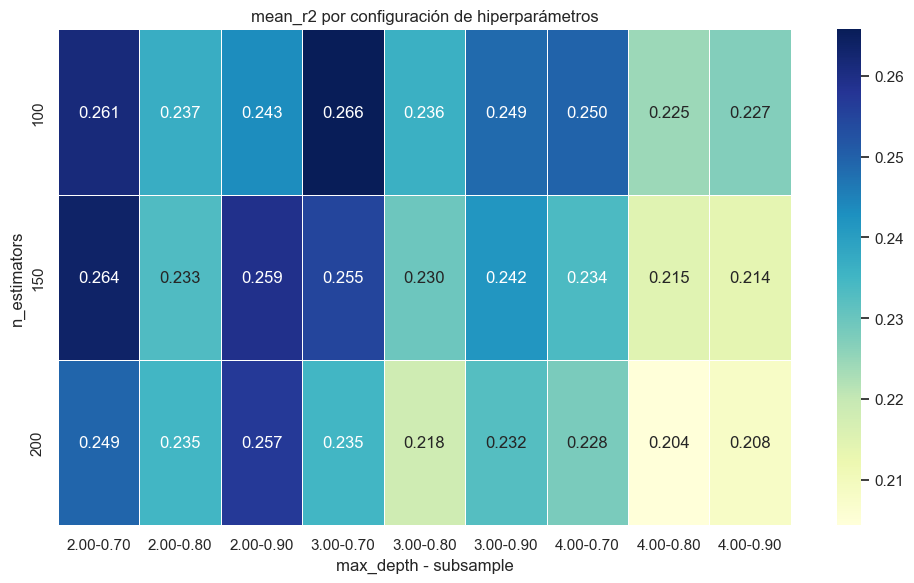

In [14]:
# Mostramos un heatmap para ver qué combinaciones de hiperparámetros son las mejores
plot_resultados_modelo(
    resultados=resultados,
    fila='n_estimators',                                
    columna=['max_depth', 'subsample'],                
    nombres_params=['n_estimators', 'max_depth', 'subsample']
)


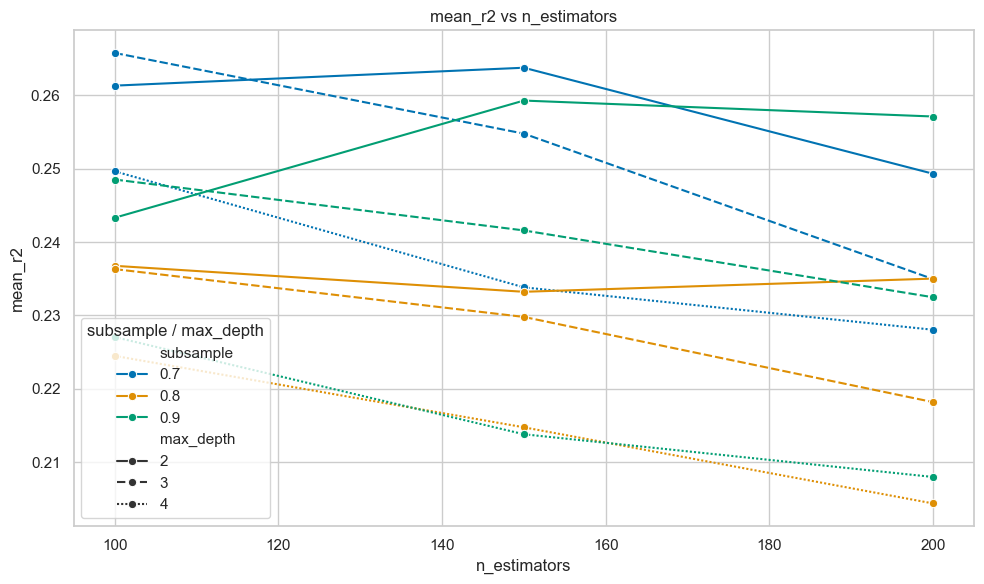

In [15]:
# Vemos otra forma de representar cómo cambia el R2 medio, en función de los 3 hiperparámetros y sus combinaciones
plot_metric_evolution(
    resultados=resultados,
    eje_x='n_estimators',
    hue='subsample',
    style='max_depth',
    nombres_params=['n_estimators', 'max_depth', 'subsample']
)


#### Análisis de la validación cruzada

Tras realizar múltiples pruebas, se ha identificado una configuración óptima para el modelo de Boosting:

- **Número de estimadores (`n_estimators`)**: 150
- **Profundidad máxima de los árboles (`max_depth`)**: 3
- **Proporción de subsample (`subsample`)**: 0.7

Con esta configuración, se procede a evaluar el rendimiento del modelo en el conjunto de validación. A continuación, se presentan los resultados obtenidos y el análisis correspondiente.

In [16]:
# Instanciamos el modelo
model = GradientBoostingRegressor(n_estimators=150, max_depth=3, subsample=0.7, random_state=42)

In [17]:
# Entrenamos el modelo con los datos de train
model.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=150, random_state=42, subsample=0.7)

In [18]:
# Predecimos sobre el conjunto de validación
predictions_boosting = model.predict(x_val)

In [19]:
# Evaluamos y mostramos los resultados
performance = evaluate_regression(y_val, predictions_boosting)

Evaluación del modelo de regresión:
MAE  (Error Absoluto Medio): 2.342
MSE  (Error Cuadrático Medio): 10.546
RMSE (Raíz del MSE): 3.247
R²   (Coef. de determinación): 0.342


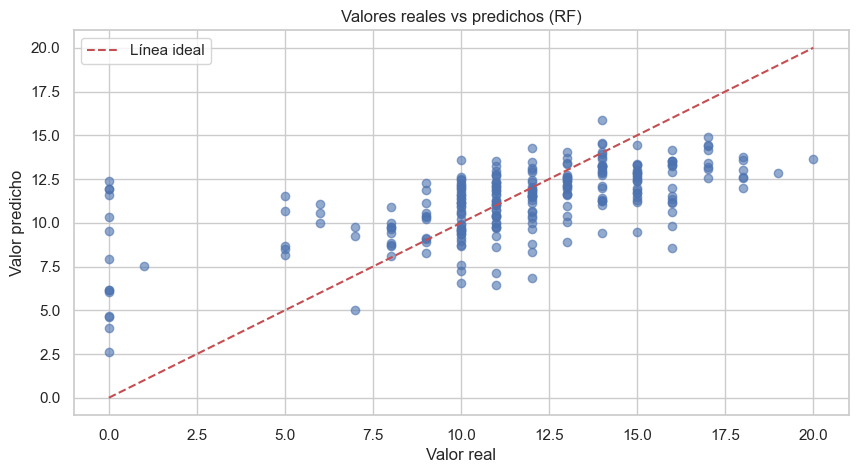

In [20]:
# Graficamos la relación entre los valores reales y las predicciones
plot_real_vs_pred(y_val, predicciones_rf,  "Valores reales vs predichos (RF)")

### Análisis del Modelo de Boosting Óptimo

#### Hiperparámetros utilizados:
- **Número de estimadores (`n_estimators`)**: 150
- **Profundidad máxima de los árboles (`max_depth`)**: 3
- **Proporción de muestras (`subsample`)**: 0.7

#### Métricas de rendimiento obtenidas:
- **Coeficiente de determinación (R²)**: 0.342  
    El modelo explica aproximadamente poco más del 30% de la variabilidad de la variable objetivo en el conjunto de validación. Indica que la capacidad predictiva del modelo es bastante limitada.
    
- **Error cuadrático medio (MSE)**: 10.546  
    Representa el promedio de los errores al cuadrado entre los valores reales y las predicciones. Es un valor considerablemente alto.

- **Raíz del error cuadrático medio (RMSE)**: 3.247  
    El error promedio de las predicciones es de aproximadamente 3.25 puntos en la escala de calificaciones, demasiado impreciso.

- **Error absoluto medio (MAE)**: 2.342  
    En promedio, las predicciones del modelo se desvían en 2.34 puntos de las calificaciones reales.

#### Ventajas del modelo de Boosting:
1. **Capacidad de manejar relaciones no lineales**:  
    Boosting combina múltiples árboles de decisión débiles para crear un modelo más robusto, lo que le permite capturar relaciones complejas entre las variables predictoras y la variable objetivo.

2. **Reducción del sesgo**:  
    Al entrenar iterativamente, el modelo corrige los errores de predicción de los árboles anteriores, lo que reduce el sesgo y mejora la precisión.

3. **Robustez frente a sobreajuste**:  
    El uso de un `subsample` menor a 1.0 introduce aleatoriedad, lo que ayuda a prevenir el sobreajuste.

#### Desventajas del modelo de Boosting:
1. **Rendimiento bajo**:  
    Aunque el modelo muestra cierta capacidad predictiva, el valor de R² sugiere que aún hay margen para mejorar. Esto podría deberse a la complejidad de los datos o a la falta de información relevante en las variables predictoras, de todas formas, las predicciones no nos aportan demasiada seguridad.

2. **Interpretabilidad limitada**:  
    Aunque se pueden analizar las importancias de las variables, el modelo en sí es menos interpretable que un árbol de decisión único, y probablemente también menos interpretable que si usamos Random Forest.

#### Conclusión:

El modelo de Boosting ajustado con los hiperparámetros obtenidos mediante validación cruzada muestra un rendimiento bajo en el conjunto de validación. Si bien tiene algunas ventajas, como su capacidad para manejar relaciones no lineales y reducir el sesgo, su rendimiento podría mejorarse en gran medida por lo que lo descartamos en favor de la elección de Random Forest para ser empleado como `Modelo 2`, con mejor R2 y más sencillo de interpretar y explicar. A continuación, en el fichero predicciones.ipynb, `usaremos Random Forest` para predecir las notas (T3) del dataset de test.

---

### Feature Importance:

Para los dos candidatos del Modelo 2 que hemos estado probando anteriormente, analicemos qué variables son las que tienen más peso, más importancia, a la hora de hacer las predicciones sin poder contar con **T1** ni con **T2**.


#### Comenzamos con Boosting:

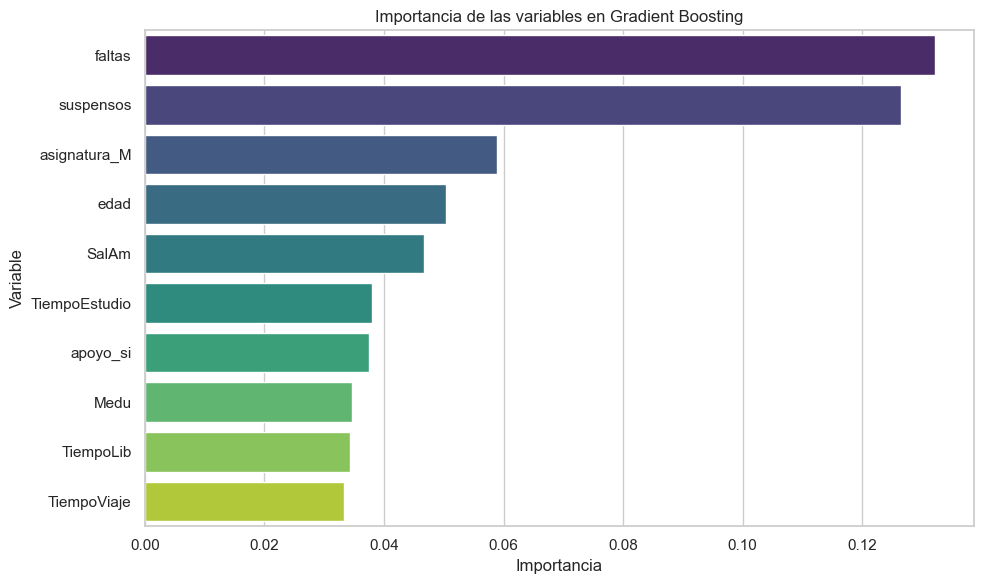

In [21]:
# Entrenamos el modelo
model = GradientBoostingRegressor(n_estimators=150, max_depth=3, subsample=0.7, random_state=42)
model.fit(x_train, y_train)

# Calculamos la importancia de las distintas variables
importancias = model.feature_importances_
features = df_train.drop(columns=["T3"]).columns

# Creamos un DataFrame ordenado, con las importancias
df_importancia = pd.DataFrame({'Feature': features, 'Importancia': importancias})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# Visualizamos el Dataframe
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importancia.head(10), x='Importancia', y='Feature', hue='Feature', palette='viridis', dodge=False, legend=False)
plt.title("Importancia de las variables en Gradient Boosting")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

El modelo de Boosting nos permite calcular la importancia de las variables utilizadas para predecir la variable objetivo **T3**. Estas importancias reflejan el peso relativo de cada variable en el proceso de predicción. A continuación, se presentan las 5 variables más importantes según el modelo de Boosting:

1. **Variable 1**: `faltas` 
    - Esta variable tiene el mayor peso en el modelo, lo que indica que es la más relevante para predecir la variable objetivo.

2. **Variable 2**: `suspensos` 
    - Tiene sentido que la cantidad de suspensos sea un factor clave para determinar el rendimiento académico.

3. **Variable 3**: `asignatura_M`  
    - La asignatura de Matemáticas, por los análisis realizados, provoca que lo salumnos saquen o muy malas notas o muy buenas notas, de ahí su influencia en el desempeño académico.

4. **Variable 4**: `edad` 
    - Ya tiene menor importancia que las anteriores, pero hay que tenerla en cuenta.

5. **Variable 5**: `SalAm` 
    - El tiempo de ocio con los amigos, puede ser un factor de liberación y descanso pero también de distracción.

Este ha sido un primer vistazo de la importancioa de las features sobre la predicción de `T3`, más adelante seguiremos investigando sobre si variables pueden ser utilizadas para diseñar estrategias de mejora en el ámbito educativo.

---


#### Continuamos con Random Forest:

En este caso, llevaremos a cabo un análisis detallado de la importancia de las features en nuestro modelo de Random Forest construido manualmente. A continuación, se describe el enfoque que hemos seguido:

1. **Validación cruzada (K-Fold):**
    - Dividimos el conjunto de datos en `nFolds` para realizar validación cruzada, con train y validation.
    - En cada iteración, se utiliza un conjunto como conjunto de validación y el resto como conjunto de entrenamiento.

2. **Construcción manual del Random Forest:**
    - Para cada iteración, se generan múltiples árboles de decisión utilizando el método de bootstrap (muestreo con reemplazo) sobre el conjunto de entrenamiento.
    - En cada árbol, se selecciona aleatoriamente un subconjunto de features (`max_feats`) para entrenar el modelo, simulando el comportamiento de un Random Forest.

3. **Cálculo de la importancia de las features:**
    - Para cada árbol, se calcula la importancia de las variables seleccionadas utilizando el atributo `feature_importances_` del árbol de decisión.
    - Estas importancias se acumulan en un diccionario (`feature_importance_total`) para todas las variables seleccionadas en todos los árboles.

4. **Promedio de las importancias:**
    - Una vez entrenados todos los árboles y completadas las iteraciones de validación cruzada, se calcula la importancia promedio de cada variable considerando todos los árboles del bosque.

5. **Resultados:**
    - Las importancias promedio se almacenan en un DataFrame ordenado, lo que permite identificar las variables más relevantes para el modelo.

Este enfoque nos permite analizar de manera robusta la contribución de cada variable en el modelo de Random Forest, considerando tanto la aleatoriedad en la selección de muestras como en la selección de features.


In [22]:
from collections import defaultdict

resultados = {}
feature_importance_total = defaultdict(list)

target_col = "T3"
nFolds = 5

X = df_train.drop(columns=[target_col])
y = df_train[target_col]

for n_trees in [275]:
    for max_feats in [0.8]:
        for max_samples in [0.9]:

            r2_scores = []
            fold_size = len(df_train) // nFolds

            for i in range(nFolds):
                valid_start = i * fold_size
                valid_end = (i + 1) * fold_size if i < nFolds - 1 else len(df_train)

                valid_indices = list(range(valid_start, valid_end))
                train_indices = list(set(range(len(df_train))) - set(valid_indices))

                X_train, X_val = X.iloc[train_indices], X.iloc[valid_indices]
                Y_train, Y_val = y.iloc[train_indices], y.iloc[valid_indices]

                predictions = []

                for _ in range(n_trees):
                    # Bootstrap
                    sample_indices = np.random.choice(X_train.index, size=int(len(X_train) * max_samples), replace=True)
                    X_bootstrap = X_train.loc[sample_indices]
                    y_bootstrap = Y_train.loc[sample_indices]

                    # Subconjunto de features
                    n_feats = int(X_train.shape[1] * max_feats)
                    feature_subset = np.random.choice(X_train.columns, size=n_feats, replace=False)
                    X_bootstrap_subset = X_bootstrap[feature_subset]
                    X_val_subset = X_val[feature_subset]

                    # Entrenamiento y predicción
                    tree = DecisionTreeRegressor()
                    tree.fit(X_bootstrap_subset, y_bootstrap)
                    y_pred = tree.predict(X_val_subset)
                    predictions.append(y_pred)

                    # === Acumular importancias de variables ===
                    importancias = tree.feature_importances_
                    for i, feat in enumerate(feature_subset):
                        feature_importance_total[feat].append(importancias[i])

                # Voto por promedio
                y_pred_final = np.mean(predictions, axis=0)
                r2 = r2_score(Y_val, y_pred_final)
                r2_scores.append(r2)

            media_r2 = np.mean(r2_scores)
            std_r2 = np.std(r2_scores)
            resultados[(n_trees, max_feats, max_samples)] = (media_r2, std_r2)

# Calculamos y ploteamos la importancia media de las variables (computando todos los árboles del bosque)
feature_importance_avg = {
    feat: np.mean(vals) for feat, vals in feature_importance_total.items()
}

df_importancias = pd.DataFrame.from_dict(feature_importance_avg, orient='index', columns=['Importancia'])
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)


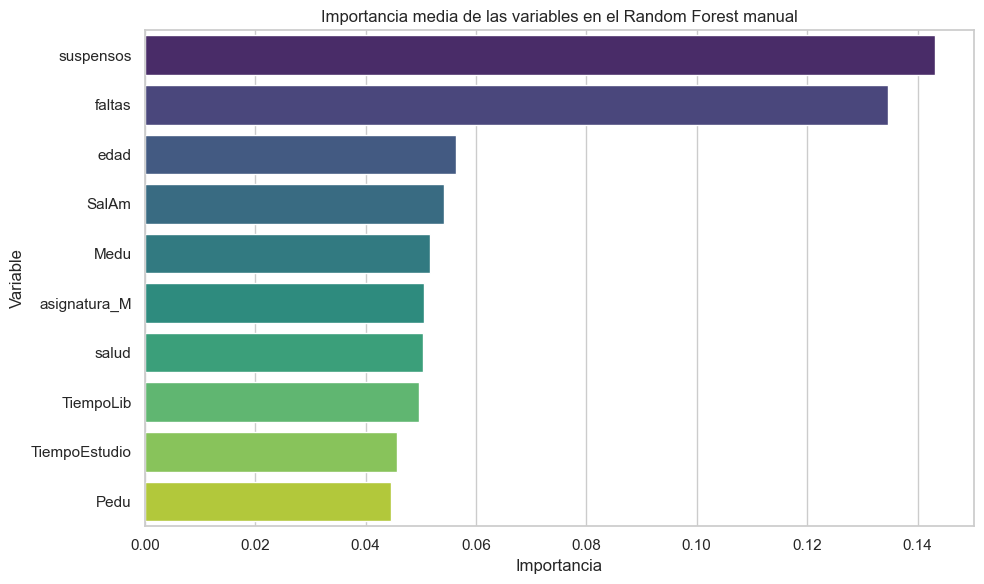

In [23]:
# Visualizamos el Dataframe
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importancias.reset_index().head(10), x='Importancia', y='index', hue='index', palette='viridis', dodge=False, legend=False)
plt.title("Importancia media de las variables en el Random Forest manual")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

El modelo de Random Forest (construido manualmente) nos indica que de media, las variables con mayor importancia a la hora de predecir el valor de las notas, `T3`, son las siguientes:

1. **Variable 1**: `suspensos` 
    - Tiene sentido que la cantidad de suspensos sea un factor clave para determinar el rendimiento académico.

2. **Variable 2**: `faltas` 
    - Esta variable tiene el casi tanto peso en el modelo con los suspensos, lo que indica que es muy relevante para predecir la variable objetivo.

3. **Variable 3**: `SalAm`  
    - El tiempo de ocio con los amigos, tiene también cierta relevancia para generar las predicciones, coincide con el modelo de Boosting.

4. **Variable 4**: `edad` 
    - Importancia muy similar a la de la variable SalAm.

5. **Variable 5**: `Medu` 
    - Importancia muy similar a la de la variable SalAm.

El hecho de que las variables con mayor importancia para predecir sobre las notas, coincidan tanto en el modelo de Boosting como el de Random Forest, nos indica claramente que son factores a tener muy en cuenta si queremos mejorar el rendimiento académico de los alumnos. Debemos profundizar en nuestro análisis, pero esto ya nos da algunas pistas sobre qué conclusiones podemos terminar encontrando.

---


### Partición del dataset en 2 grupos según su T3:

A continuación, estudiaremos el dataset dividiéndolo en dos grupos: aquellos alumnos con calificaciones suspensas (T3 < 10) y aquellos con notas de aprobado (T3 >= 10). Posteriormente, analizaremos las variables más correlacionadas con T3 en cada uno de estos subconjuntos.

Este enfoque es interesante porque permite identificar patrones y factores diferenciadores que influyen en el rendimiento académico dependiendo del nivel de calificación que tiene cada alumno. Al separar los datos, podemos observar cómo las variables afectan de manera distinta a los alumnos con bajo rendimiento frente a aquellos con mejores resultados. Esto nos aporta información valiosa para diseñar estrategias específicas de mejora adaptadas a las necesidades de cada grupo.


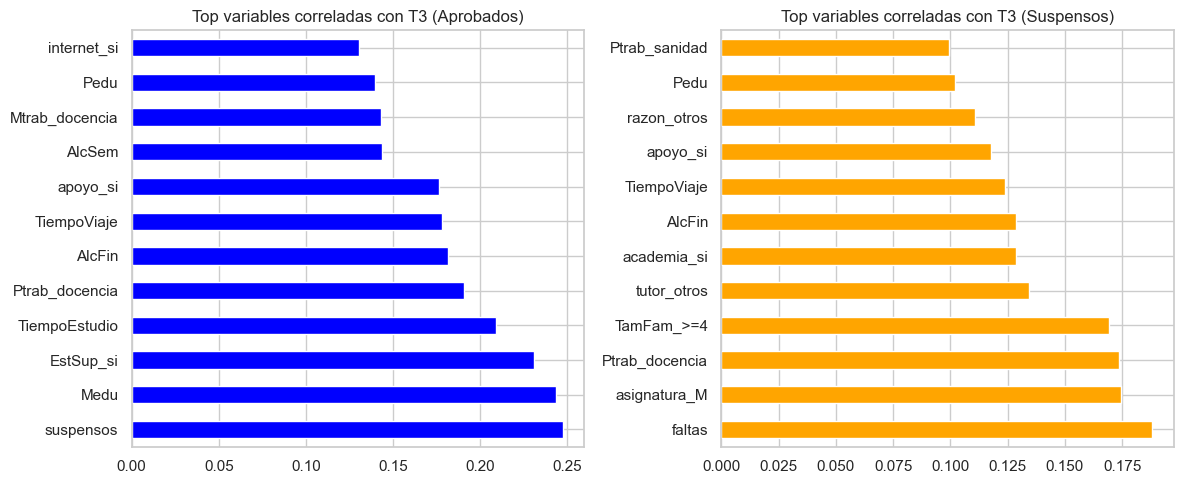

In [24]:
# Creamos los subconjuntos
df_aprobados = df_train[df_train["T3"] >= 10]
df_suspensos = df_train[df_train["T3"] < 10]

# Seleccionamos solo variables numéricas
numericas = df_train.select_dtypes(include=['int64', 'float64']).columns

# Calculamos correlaciones con T3 para cada grupo
cor_aprobados = df_aprobados[numericas].corr()['T3'].drop('T3')
cor_suspensos = df_suspensos[numericas].corr()['T3'].drop('T3')

# Ordenamos por importancia absoluta
top_aprobados = cor_aprobados.abs().sort_values(ascending=False).head(12)
top_suspensos = cor_suspensos.abs().sort_values(ascending=False).head(12)

# Graficamos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
top_aprobados.loc[top_aprobados.index].plot(kind='barh', color="blue")
plt.title("Top variables correladas con T3 (Aprobados)")

plt.subplot(1, 2, 2)
top_suspensos.loc[top_suspensos.index].plot(kind='barh', color='orange')
plt.title("Top variables correladas con T3 (Suspensos)")

plt.tight_layout()
plt.show()


#### Variables más correlacionadas con T3

En el gráfico anterior, observamos que las variables más correlacionadas con T3 en el grupo de aprobados incluyen factores como el tiempo de estudio, el nivel educativo de los padres y por supuesto el número de suspensos del alumno. 

Por otra parte, en el grupo de suspensos destacan variables como las faltas, la asignatura cursada (Matemáticas está claramente causando problemas a los alumnos con peores notas), o que los padres de estos alumnos se dediquen a la docencia. Quizá este último factor que se ha mencionado tenga que ver con que los alumnos se confían porque creen que sus padres les van a poder ayudar con las asignaturas que peor llevan, y que van a terminar aprobando, por lo tanto acaban dejándose llevar, no estudian lo suficiente y al final no logran aprobar. 

De forma general, observamos claramente que los factores que más correlación tienen con `T3` son totalmente distintos si perteneces al grupo de alumnos que ha suspendido que si perteneces al grupo de alumnos que han aprobado. Esto nos sugiere que seguramente debamos tomar medidas distintas para cubrir las necesidades de unos alumnos o de otros, debemos tener esto en cuenta.

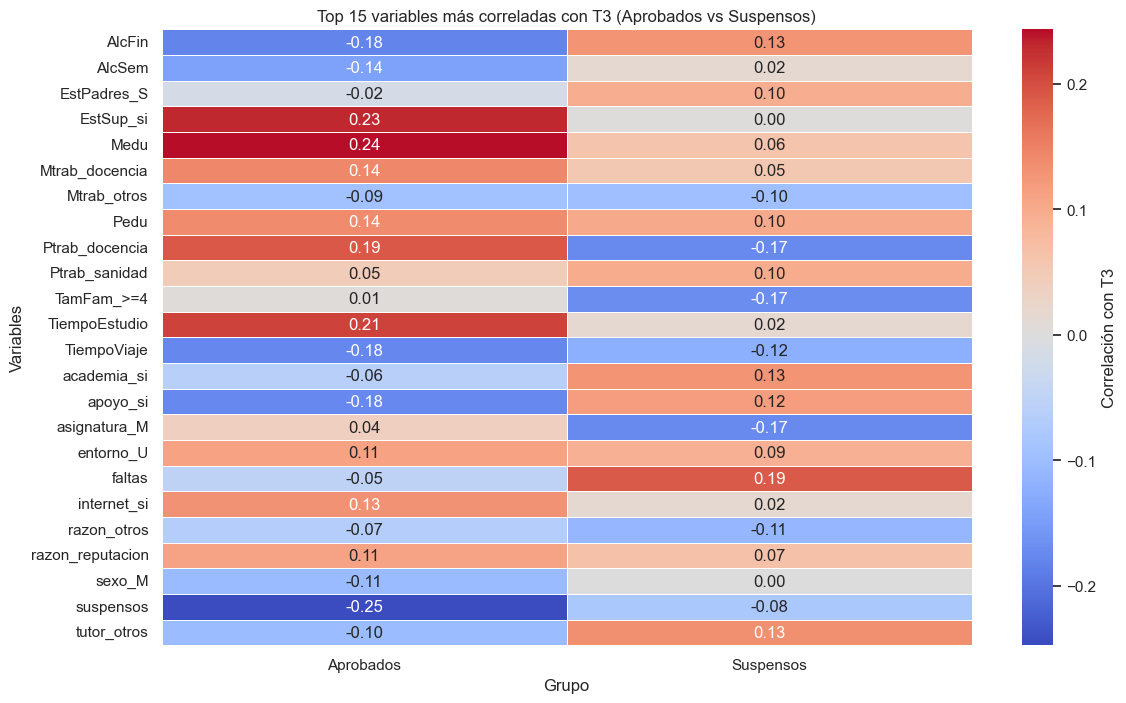

In [25]:
# Seleccionamos tan solo las top 15 variables más correladas con T3 (en valor absoluto)
top_apr_vars = cor_aprobados.abs().sort_values(ascending=False).head(15).index
top_sus_vars = cor_suspensos.abs().sort_values(ascending=False).head(15).index

# Unimos las variables clave (sin duplicados)
vars_clave = sorted(set(top_apr_vars).union(set(top_sus_vars)))

# Creamos el DataFrame de correlaciones solo para esas variables
cor_df = pd.DataFrame({
    "Aprobados": cor_aprobados[vars_clave],
    "Suspensos": cor_suspensos[vars_clave]
})

# Graficamos el heatmap
plt.figure(figsize=(12, len(cor_df)*0.3))
sns.heatmap(cor_df, cmap="coolwarm", annot=True, center=0, fmt=".2f", linewidths=0.5, cbar_kws={"label": "Correlación con T3"})
plt.title("Top 15 variables más correladas con T3 (Aprobados vs Suspensos)")
plt.ylabel("Variables")
plt.xlabel("Grupo")
plt.tight_layout()
plt.show()

### Análisis Comparativo de Correlaciones con T3 (Aprobados vs Suspensos)

Analicemos más profundamente las correlaciones de los distintos subconjuntos de datos, pero ahora teniendo también en cuenta si la correlación con T3 es positiva o negativa. Por simplicidad, hemos mostrado tan solo las 15 variables que en valor absoluto mayor correlación tienen con la variable objetivo.

#### 1. Variables Comunes en ambos subconjuntos pero con diferente signo o intensidad

- **Ptrab\_docencia**  
    - En el grupo de aprobados, presenta una correlación positiva con T3 (`+0.19`), lo que sugiere una posible asociación con un mejor rendimiento académico.  
    - En el grupo de suspensos, la correlación es negativa (`-0.17`), lo que podría indicar que este factor no representa una ventaja o incluso genera un impacto adverso.

- **TiempoEstudio**  
    - Alta correlación positiva en aprobados (`+0.21`), mientras que en suspensos prácticamente desaparece (`+0.02`).  
    - Esto sugiere que el tiempo de estudio tiene un impacto significativo solo cuando existe una base académica favorable.

- **TiempoViaje**  
    - Correlación negativa en ambos grupos, más pronunciada en aprobados (`-0.18`) que en suspensos (`-0.12`).  
    - Este patrón podría reflejar el impacto del tiempo de desplazamiento en el rendimiento académico.

- **Apoyo\_si** y **academia\_si**  
    - Correlaciones negativas en aprobados pero positivas en suspensos.  
    - Esto podría reflejar una relación de necesidad, donde los alumnos con peor rendimiento recurren más a apoyos externos, aunque esto no necesariamente mejora su desempeño. En cambio los alumnos que tienen mejores resultados, no demandan tanto el uso de academias o apoyos externos.

#### 2. Variables con Influencia Contraria entre Grupos

- Variables como **Ptrab\_docencia**, **asignatura\_M** y **TamFam\_>=4** muestran correlaciones positivas en aprobados pero negativas en suspensos.  
- Esto podría indicar que ciertos factores benefician únicamente en contextos académicos favorables, mientras que en entornos más precarios pueden no ser aprovechados o incluso percibirse como obstáculos.

#### 3. Variables con Mayor Impacto en Aprobados

- **EstSup\_si**, **Medu**, **TiempoEstudio**, **internet\_si** y **Ptrab\_docencia** presentan correlaciones superiores a `+0.13`.  
- Estas variables están asociadas con:
    - Apoyo y expectativas familiares.
    - Acceso a recursos educativos.
    - Hábitos autónomos de estudio.

En conjunto, estos factores sugieren que el éxito en el grupo de aprobados está relacionado con un entorno familiar positivo y hábitos de estudio consistentes, además de una ligera influencia del acceso a recursos importantes para el estudio, como por ejemplo internet.

- Además, **AlcSem** y **AlcFin**, tienen un claro impacto negativo en el grupo de aprobados, lo cual indica que dentro de los estudiantes con mejores notas, la consumición del alcohol perjudica el rendimiento académico.

#### 4. Variables con Mayor Impacto en Suspensos

- **Faltas** (`+0.19`), **tutor\_otros** (`+0.13`), **apoyo\_si** y **academia\_si**, Alc presentan correlaciones positivas.  
- Sorprende el hecho de que la relación entre T3 y las faltas sea positiva, no obstante, esto no implica que faltar más a clase ayude a mejorar la nota, sino que dentro de quienes suspenden, los que suspenden con mejores notas, tienden a tener más faltas, lo que puede estar reflejando dinámicas específicas del grupo como problemas estructurales de aprendizaje, diferencias en motivación, o alumnos que no mejoran su rendimiento a pesar de asistir a las clases.

#### 5. Variables con Impacto Negativo Constante

- **Suspensos previos**, **sexo\_M** y **TiempoViaje** muestran correlaciones negativas en ambos grupos.  
- Estos factores representan riesgos generales que afectan el rendimiento académico independientemente del grupo.

#### Conclusiones

1. En el grupo de **aprobados**, las correlaciones positivas están asociadas con recursos familiares, fromación de los pades, buenos hábitos, motivación y constancia.  
2. En el grupo de **suspensos**, las variables más correlacionadas están relacionadas con carencias, ausencias y apoyos correctivos, más que con elementos estructurales de mejora. También resalta que en concreto la asignatura de Matemáticas, está causando bastantes problemas entre los alumnos que no logran aprobar.


---


## Exploración Adicional:

---

### Análisis de Componentes Principales (PCA)

El **Análisis de Componentes Principales (PCA)** es una técnica de reducción de dimensionalidad que permite transformar un conjunto de variables posiblemente correlacionadas en un conjunto más pequeño de variables no correlacionadas, denominadas **componentes principales**. Este método nos puede ser útil cuando trabajamos con datasets de alta dimensionalidad (como sucede en nuestro caso), ya que facilita la interpretación de los datos y puede mejorar el rendimiento de los modelos al eliminar redundancias.

#### Motivación para aplicar PCA

En la matriz de correlación observada previamente en `exploracion.ipynb`, hemos identificado que varias variables presentan correlaciones significativas entre sí. Esto sugiere que existe redundancia en la información proporcionada por estas variables, lo que puede dificultar el entrenamiento de los modelos y aumentar el riesgo de sobreajuste. Además, trabajar con un gran número de variables puede incrementar el coste computacional y complicar la interpretación de los resultados.

Por estas razones, aplicaremos PCA para:

1. **Reducir la dimensionalidad** del dataset, manteniendo la mayor cantidad posible de información relevante.
2. **Eliminar la multicolinealidad** entre las variables, ya que las componentes principales son ortogonales entre sí.
3. **Facilitar la visualización** y análisis de los datos en un espacio de menor dimensión.
4. **Analizar cuáles son las variables más informativas del dataset** para así poder tomar medidas preventivas en el ámbito escolar.

#### Pros y contras del PCA

**Ventajas:**
- Reduce la complejidad del modelo al trabajar con menos variables.
- Mejora la eficiencia computacional al disminuir la dimensionalidad.
- Ayuda a eliminar la multicolinealidad, lo que puede beneficiar a ciertos modelos de aprendizaje automático.
- Facilita la visualización de los datos en 2D o 3D.

**Desventajas:**
- Las componentes principales son combinaciones lineales de las variables originales, lo que puede dificultar la interpretación directa de los resultados.
- Puede perderse información relevante si no se selecciona un número adecuado de componentes principales.
- No considera la relación con la variable objetivo, ya que es un método no supervisado.

#### Enfoque

En este apartado, aplicaremos PCA a ambos subconjuntos de datos (suspensos y aprobados) utilizando el dataset de entrenamiento para identificar las componentes principales que explican la mayor parte de la varianza.

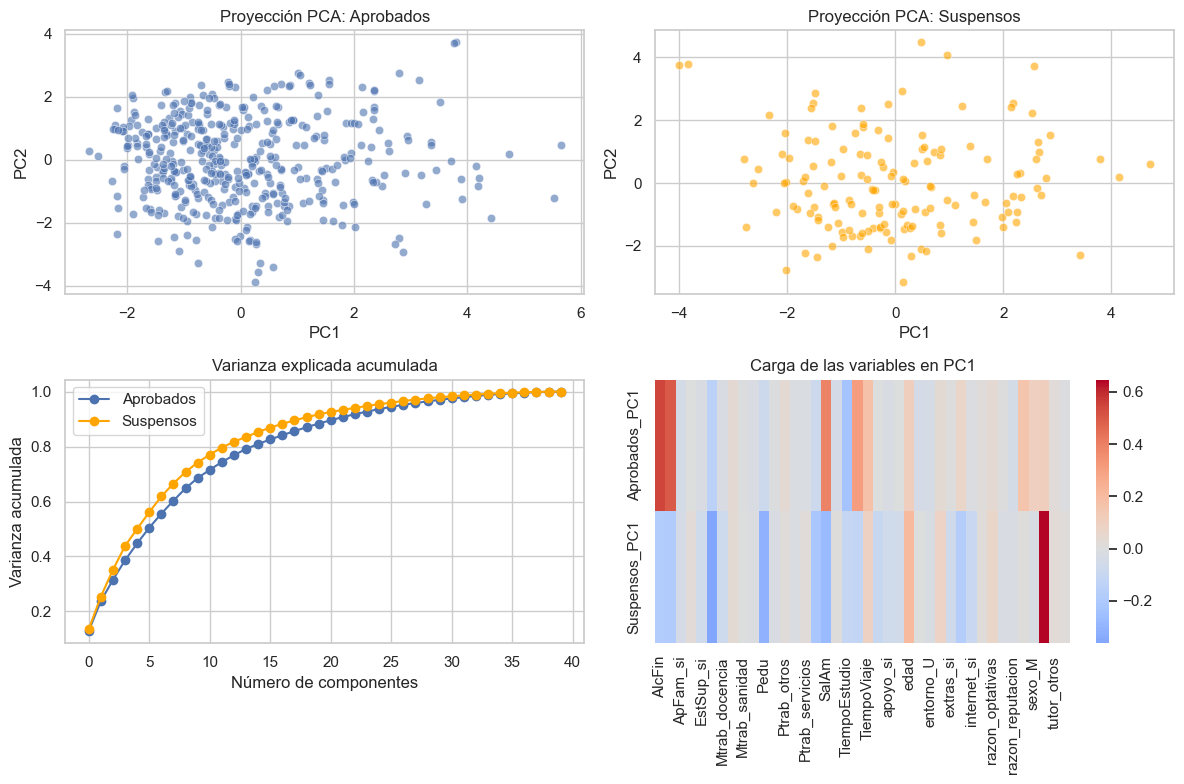

In [26]:
# Creamos 2 PCAs
pca_apr = PCA()
pca_sus = PCA()

# Seleccionamos las variables numéricas (excepto T3 que es la target)
vars_numericas = df_train.select_dtypes(include=['int64', 'float64']).columns.drop("T3")

X_apr_pca = pca_apr.fit_transform(df_aprobados[vars_numericas])
X_sus_pca = pca_sus.fit_transform(df_suspensos[vars_numericas])

# Obtenemos la varianza explicada
var_apr = pca_apr.explained_variance_ratio_
var_sus = pca_sus.explained_variance_ratio_


# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Proyección PC1 vs PC2
sns.scatterplot(x=X_apr_pca[:, 0], y=X_apr_pca[:, 1], ax=axes[0, 0], alpha=0.6)
axes[0, 0].set_title("Proyección PCA: Aprobados")
axes[0, 0].set_xlabel("PC1")
axes[0, 0].set_ylabel("PC2")

sns.scatterplot(x=X_sus_pca[:, 0], y=X_sus_pca[:, 1], ax=axes[0, 1], alpha=0.6, color="orange")
axes[0, 1].set_title("Proyección PCA: Suspensos")
axes[0, 1].set_xlabel("PC1")
axes[0, 1].set_ylabel("PC2")

# Varianza explicada acumulada
axes[1, 0].plot(np.cumsum(var_apr), marker='o', label="Aprobados")
axes[1, 0].plot(np.cumsum(var_sus), marker='o', label="Suspensos", color="orange")
axes[1, 0].set_title("Varianza explicada acumulada")
axes[1, 0].set_xlabel("Número de componentes")
axes[1, 0].set_ylabel("Varianza acumulada")
axes[1, 0].legend()
axes[1, 0].grid(True)

# Carga de las variables en PC1
loadings_apr = pd.Series(pca_apr.components_[0], index=vars_numericas)
loadings_sus = pd.Series(pca_sus.components_[0], index=vars_numericas)
df_loadings = pd.DataFrame({
    "Aprobados_PC1": loadings_apr,
    "Suspensos_PC1": loadings_sus
}).sort_index()

sns.heatmap(df_loadings.T, cmap="coolwarm", center=0, annot=False, ax=axes[1, 1])
axes[1, 1].set_title("Carga de las variables en PC1")

plt.tight_layout()
plt.show()

### Análisis del PCA por separado: Aprobados vs Suspensos

Este análisis compara la estructura latente de los datos entre los estudiantes **aprobados (T3 ≥ 5)** y **suspensos (T3 < 5)**, se estudian tres aspectos clave:

1. Distribución de los datos en el plano PC1-PC2  
2. Varianza explicada acumulada  
3. Carga (loadings) de las variables en la primera componente principal (PC1)

#### 1. Proyección PCA: Aprobados vs Suspensos

##### Aprobados

- Nube de puntos **compacta** y centrada.
- Denota **estructura ordenada y homogénea**.
- Las variables que definen este grupo parecen estar **altamente correlacionadas entre sí**.
- La variabilidad del rendimiento se explica bien por pocos factores clave.

##### Suspensos

- Nube de puntos más **dispersa y heterogénea**.
- Se observan valores extremos en ambas componentes.
- Indica **mayor diversidad interna**: diferentes causas para el bajo rendimiento (falta de motivación, contexto social, necesidad de apoyo...)

#### 2. Varianza explicada acumulada

- Los **suspensos alcanzan el 80% de varianza explicada** con menos componentes que los aprobados.
- Esto sugiere que hay **menos complejidad estructural interna** en este grupo.
- En cambio, los **aprobados** requieren más componentes → puede implicar **influencia simultánea de más factores sutiles** (ej. entorno familiar, hábitos, motivación…).

#### 3. Carga de las variables en PC1 (loadings)

El heatmap muestra la **contribución de cada variable original a la PC1** en cada grupo. Se observan diferencias claras:

##### Aprobados

- Variables con **carga alta**:
  - `AlcFin`, `SalAm`, `TiempoEstudio`, `TiempoViaje`.
- Representan un eje de **apoyo familiar, recursos y esfuerzo académico**.

##### Suspensos

- Las cargas están más **dispersas y menos estructuradas**.
- Destacan:
  - `EstSup_si`, `Mtrab_docencia`, `Pedu`, `SalAm` : carga negativa .
  - `sexo_M`, `edad`: presentes con cierto peso . El eje PC1 podría reflejar un **perfil de carencias y medidas correctivas**.
- No hay una dirección dominante tan clara como en aprobados.

### Conclusión global

- El grupo de **aprobados** presenta una estructura interna **más definida y asociada a recursos académicos y constancia**.
- Los **suspensos** presentan un patrón más **difuso**, posiblemente por una **mezcla de causas** detrás del bajo rendimiento.

- PCA ha permitido evidenciar que **las variables clave cambian según el grupo**, lo que podría orientar futuros análisis que quisiéramos hacer, modelos predictivos o intervenciones educativas. Esto nos sirve para guiar nuestras recomendaciones o propuestas de mejora a las instituciones educativas en cuestión.



In [27]:
componentes_aprobados = pd.DataFrame(
    pca_apr.components_,
    columns=df_train.drop(columns=[variable_objetivo]).columns,  # Usamos las columnas de df_train excluyendo T3
    index=[f"PC{i+1}" for i in range(pca_apr.n_components_)]
)
componentes_aprobados.head(5)

,edad,Medu,Pedu,TiempoViaje,TiempoEstudio,suspensos,RelFam,TiempoLib,SalAm,AlcSem,...,tutor_padre,apoyo_si,ApFam_si,academia_si,extras_si,enfermeria_si,EstSup_si,internet_si,pareja_si,asignatura_M
PC1,0.109193,-0.145959,-0.075065,0.172572,-0.233914,0.109385,-0.080858,0.311124,0.392028,0.496101,...,-0.011587,-0.025500,-0.047921,-0.000374,0.002039,-0.041334,-0.020861,-0.013098,0.014964,-0.000733
PC2,-0.124716,0.589401,0.581439,-0.288570,0.116900,-0.143721,0.000887,0.070562,0.116749,0.153952,...,-0.001926,-0.022847,0.095320,0.055375,0.079567,0.053366,0.044575,0.079561,0.006634,0.055094
PC3,-0.006899,-0.052115,-0.027589,-0.177111,-0.302582,0.048976,0.602948,0.350521,-0.030776,-0.227835,...,-0.020569,-0.002703,-0.037171,-0.034130,0.038594,0.024451,-0.004369,-0.034595,-0.057556,-0.002933
PC4,0.526275,0.053946,-0.027190,0.031345,0.525386,0.051537,0.243686,0.346730,0.373297,-0.106505,...,-0.053061,-0.039104,0.033906,-0.000596,0.025315,-0.006630,-0.002724,0.040740,0.077007,-0.022445
PC5,-0.187243,-0.130924,-0.292924,-0.092962,0.586664,-0.040122,-0.020857,-0.117677,-0.134097,0.214800,...,0.030795,0.019866,0.043826,-0.010539,0.059810,-0.021285,0.026563,-0.042789,-0.006579,-0.035984


In [28]:
componentes_suspensos = pd.DataFrame(
    pca_sus.components_,
    columns=df_train.drop(columns=[variable_objetivo]).columns,  # Usamos las columnas de df_train excluyendo T3
    index=[f"PC{i+1}" for i in range(pca_sus.n_components_)]
)
componentes_suspensos.head(5)

,edad,Medu,Pedu,TiempoViaje,TiempoEstudio,suspensos,RelFam,TiempoLib,SalAm,AlcSem,...,tutor_padre,apoyo_si,ApFam_si,academia_si,extras_si,enfermeria_si,EstSup_si,internet_si,pareja_si,asignatura_M
PC1,0.204888,-0.360380,-0.307144,0.094929,-0.105045,0.646532,-0.215080,-0.118075,-0.276526,-0.190877,...,0.011846,-0.063489,-0.040417,-0.097364,-0.067806,0.000683,-0.061993,-0.090588,0.014097,-0.060841
PC2,0.137459,0.002249,0.046699,0.134827,-0.151502,0.416121,0.102722,0.396531,0.388913,0.448962,...,0.014735,0.001456,-0.013746,0.018571,0.045862,0.014004,-0.024745,0.010058,-0.001501,-0.032665
PC3,-0.006306,0.315469,0.273419,-0.347080,-0.026347,0.381148,-0.426192,-0.084531,-0.099350,0.106851,...,0.031344,0.024565,0.018799,0.028479,-0.021283,-0.017070,-0.001519,0.033046,-0.016735,0.040406
PC4,-0.040209,-0.269270,-0.290332,0.274472,-0.247927,-0.227492,-0.056352,-0.192592,-0.209142,0.277459,...,-0.037638,-0.034814,-0.120594,-0.010634,-0.036870,-0.014969,-0.039356,-0.040341,0.041958,-0.101641
PC5,-0.049751,-0.143713,-0.244981,-0.019458,0.186015,0.157922,0.249489,0.311826,0.375609,-0.242356,...,-0.037765,0.022832,0.025257,-0.009763,0.027901,0.040449,-0.024158,0.017741,0.015850,-0.014708


In [29]:
# Vemos cuáles son las variables que más peso tienen en PC1 para el grupo de aprobados
componentes_aprobados.T["PC1"].sort_values(ascending=False, key=np.abs).head(10)

AlcFin           0.548053
AlcSem           0.496101
SalAm            0.392028
TiempoLib        0.311124
TiempoEstudio   -0.233914
TiempoViaje      0.172572
salud            0.164126
Medu            -0.145959
suspensos        0.109385
edad             0.109193
Name: PC1, dtype: float64

In [30]:
# Vemos cuáles son las variables que más peso tienen en PC2 para el grupo de suspensos
componentes_suspensos.T["PC1"].sort_values(ascending=False, key=np.abs).head(10)

suspensos    0.646532
Medu        -0.360380
Pedu        -0.307144
SalAm       -0.276526
RelFam      -0.215080
edad         0.204888
AlcSem      -0.190877
AlcFin      -0.183172
faltas      -0.173298
TiempoLib   -0.118075
Name: PC1, dtype: float64

### Análisis de las Variables con Mayor Peso en la Primera Componente Principal (PC1)

#### Grupo de Aprobados
En el grupo de alumnos aprobados, las variables que más contribuyen a la primera componente principal (PC1) son las siguientes:

1. **AlcFin**: 0.548 (Influencia positiva)
2. **AlcSem**: 0.496 (Influencia positiva)
3. **SalAm**: 0.392 (Influencia positiva)
4. **TiempoLib**: 0.311 (Influencia positiva)
5. **TiempoEstudio**: -0.233 (Influencia negativa)

Estas variables reflejan que, en este grupo, el consumo de alcohol (tanto en fin de semana como entre semana), el tiempo de salir con amigos y el tiempo libre tienen un peso significativo en la variabilidad de los datos. Esto podría estar relacionado con un equilibrio entre actividades sociales y académicas.

#### Grupo de Suspensos
En el grupo de alumnos suspensos, las variables con mayor peso en la primera componente principal (PC1) son:

1. **Suspensos**: 0.646 (Influencia positiva)
2. **Medu**: -0.360 (Influencia negativa)
3. **Pedu**: -0.307 (Influencia negativa)
4. **SalAm**: -0.277 (Influencia negativa)
5. **RelFam**: -0.215 (Influencia negativa)

En este caso, destaca la variable **suspensos**, que tiene una contribución muy alta y positiva, indicando que el número de suspensos previos es un factor clave en este grupo. Además, las variables relacionadas con el nivel educativo de los padres (**Medu** y **Pedu**) y el tiempo de salir con amigos (**SalAm**) tienen una influencia negativa, lo que podría sugerir un entorno menos favorable para el rendimiento académico.

#### Comparación entre Grupos
- **Aprobados**: Las variables con mayor peso están relacionadas con actividades sociales y tiempo libre, lo que podría indicar un equilibrio positivo entre la vida personal y académica.
- **Suspensos**: Las variables clave reflejan factores más estructurales, como el historial académico (suspensos) y el entorno familiar (nivel educativo de los padres), que parecen tener un impacto negativo en este grupo.

Este análisis nos permite identificar patrones diferenciados entre ambos grupos, lo que puede ser útil para diseñar estrategias específicas de mejora en el ámbito educativo.

---

### Clustering del dataset completo (sin T1 ni T2)

El clustering es una técnica de aprendizaje no supervisado que nos permite agrupar observaciones en función de sus características, de manera que las observaciones dentro de un mismo grupo sean más similares entre sí que con las de otros grupos. En este caso, vamos a aplicar clustering al dataset completo (excluyendo las variables T1 y T2) para identificar patrones ocultos en los datos que puedan ayudarnos a entender mejor las relaciones entre las variables y los estudiantes.

#### ¿Por qué hacemos clustering?

- **Identificar patrones ocultos**: Queremos descubrir grupos de estudiantes con características similares que puedan estar relacionados con su rendimiento académico.
- **Segmentación de estudiantes**: Esto nos permitirá dividir a los estudiantes en grupos homogéneos, lo que puede ser útil para diseñar estrategias personalizadas de mejora educativa, proporcionarles nuevos recursos, pensar iniciativas, etc.
- **Exploración de relaciones entre variables**: Al analizar los clusters, podemos identificar qué variables tienen mayor peso en la formación de los grupos y cómo estas se relacionan con la variable objetivo (T3).

#### ¿Qué buscamos?

- **Grupos homogéneos**: Queremos encontrar clusters que representen grupos de estudiantes con características similares.
- **Relación con el rendimiento académico**: Analizaremos cómo se distribuyen las calificaciones (T3) dentro de cada cluster para entender si existen diferencias significativas entre los grupos.
- **Variables clave**: Identificaremos las variables más importantes que diferencian a los clusters, lo que puede proporcionar información valiosa para la toma de decisiones en el ámbito educativo.

#### Metodología

- **Reducción de dimensionalidad**: Utilizaremos PCA para proyectar los datos en un espacio de menor dimensión, lo que facilita la visualización y mejora la eficiencia del clustering.
- **Determinación del número óptimo de clusters**: Aplicaremos el método del silhouette score para identificar el número de clusters que mejor se ajusta a los datos.
- **Aplicación del algoritmo de clustering**: Usaremos KMeans para agrupar los datos en los clusters identificados.
- **Análisis de resultados**: Visualizaremos los clusters en el espacio PCA, analizaremos la distribución de T3 por cluster y exploraremos las características promedio de cada grupo.



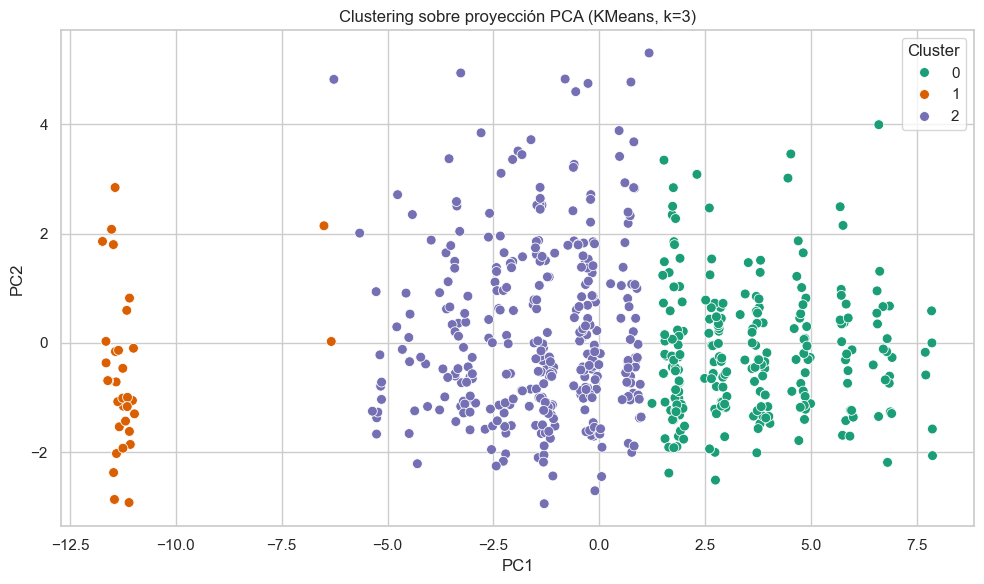

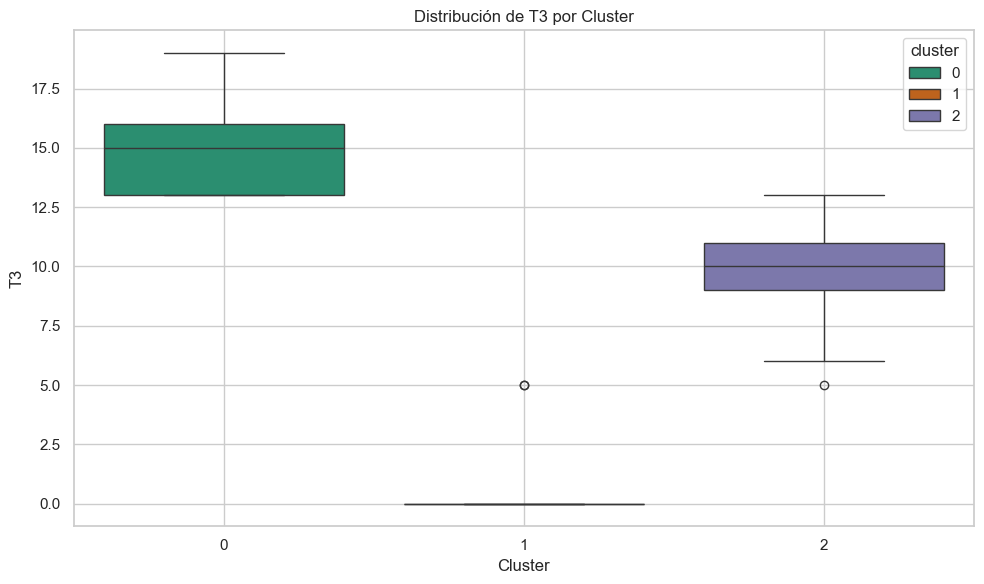

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,227.0,14.920705,1.730227,13.0,13.0,15.0,16.0,19.0
1,34.0,0.294118,1.194163,0.0,0.0,0.0,0.0,5.0
2,323.0,9.894737,1.592316,5.0,9.0,10.0,11.0,13.0


In [31]:
# Aplicamos PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_train)

# Determinamos el número óptimo de clusters
k_range = range(2, 10)
silhouette_scores = []  # Aquí vamos a ir guardando los scores

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, labels))

# Elegimos el k óptimo
optimal_k = k_range[np.argmax(silhouette_scores)]

# Aplicamos KMeans usando el k óptimo que hemos obtenido
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels_final = kmeans.fit_predict(X_pca)

# Añadimos los clusters al DataFrame original
df_clustered = df_train.copy()
df_clustered["cluster"] = labels_final

# Visualizamos cómo se distribuyen de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_final, palette="Dark2", s=50)
plt.title(f"Clustering sobre proyección PCA (KMeans, k={optimal_k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribución de T3 por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clustered, x="cluster", y=variable_objetivo, hue="cluster", palette="Dark2", dodge=False)
plt.title("Distribución de T3 por Cluster")
plt.xlabel("Cluster")
plt.ylabel("T3")
plt.grid(True)
plt.tight_layout()
plt.show()

# Estadísticas descriptivas por cluster
desc = df_clustered.groupby("cluster")[variable_objetivo].describe()
display(desc)

### Análisis del Clustering aplicado sobre la proyección PCA

Se ha realizado un análisis no supervisado mediante **KMeans clustering** sobre los datos proyectados en dos componentes principales obtenidas con **PCA**. El objetivo era identificar **patrones naturales** en el conjunto de estudiantes, sin tener en cuenta directamente su calificación `T3`.

El modelo ha determinado de forma automática que el número óptimo de clusters es **k = 3**.

#### Visualización en el espacio PCA

En el primer gráfico se puede observar cómo los estudiantes se agrupan en tres zonas bien definidas sobre el plano PCA1 vs PCA2:

- **Cluster 0 (verde)**: grupo más a la derecha, compacto y claramente separado.
- **Cluster 1 (naranja)**: completamente a la izquierda, grupo muy homogéneo y denso.
- **Cluster 2 (morado)**: grupo intermedio, con mayor dispersión.

#### Distribución de T3 por cluster

El boxplot revela **diferencias notables** en el rendimiento académico (`T3`) entre los clusters:

| Cluster | Tamaño | Media T3 | Descripción                                    |
|---------|--------|----------|------------------------------------------------|
| **0**   | 227    | 14.92     | Estudiantes con **alto rendimiento**. Calificaciones muy homogéneas y elevadas. |
| **1**   | 34     | 0.29      | Estudiantes con **T3 prácticamente nulo**. Este grupo representa un perfil de **abandono o no presentación**. |
| **2**   | 323    | 9.89      | Estudiantes de **rendimiento intermedio**. Mayor dispersión en las calificaciones. |

Al principio puede extrañar que se genere un cluster de alumnos con notas de ceros redondos; no obstante, si observamos detenidamente el dataframe, vemos que hay exactamente 32 observaciones de alumnos con notas nulas, y también 3 alumnos con notas de 5. Eso es totalmente coherente con lo que estamos observando, el cluster 1, el de color naranja, tiene 34 integrantes, entre los cuales se encuentran los 32 nulos, y un par de alumnos con nota de 5.

#### Interpretación de perfiles por cluster

##### Cluster 0 – Alto rendimiento

- Muy separado del resto en el eje PC1 → indica **características claramente diferenciadoras**.
- Notable homogeneidad → posiblemente buen entorno familiar, hábitos de estudio consolidados, y motivación.
- Representa el grupo "ideal", con calificaciones consistentes por encima de 13 (percentil 25).

##### Cluster 1 – Abandono escolar / fracaso absoluto

- Se encuentra completamente aislado en la izquierda del plano PCA.
- Todos los alumnos tienen `T3 = 0`, o cerca, con desviación muy baja.
- El modelo lo identifica claramente por sus **características estructurales comunes**, que probablemente incluyan:
  - Altas tasas de faltas
  - Bajo nivel de estudios familiares
  - Falta de motivación o recursos

##### Cluster 2 – Rendimiento medio y heterogéneo

- El más numeroso.
- `T3` con media alrededor de 10, pero con **alta dispersión**.
- Podría representar alumnos con potencial que aún no consolidan su rendimiento, o perfiles mixtos.

#### Conclusiones

- Haciendo clustering hemos conseguido **distinguir tres perfiles educativos claros**.
- El hecho de que `T3 = 0` forme un grupo completamente separado indica que **hay factores estructurales fácilmente detectables** detrás del abandono o el fracaso absoluto.
- Veamos qué variables son las que caracterizan en mayor medida a cada cluster, y que lo diferencian del resto de clusters.

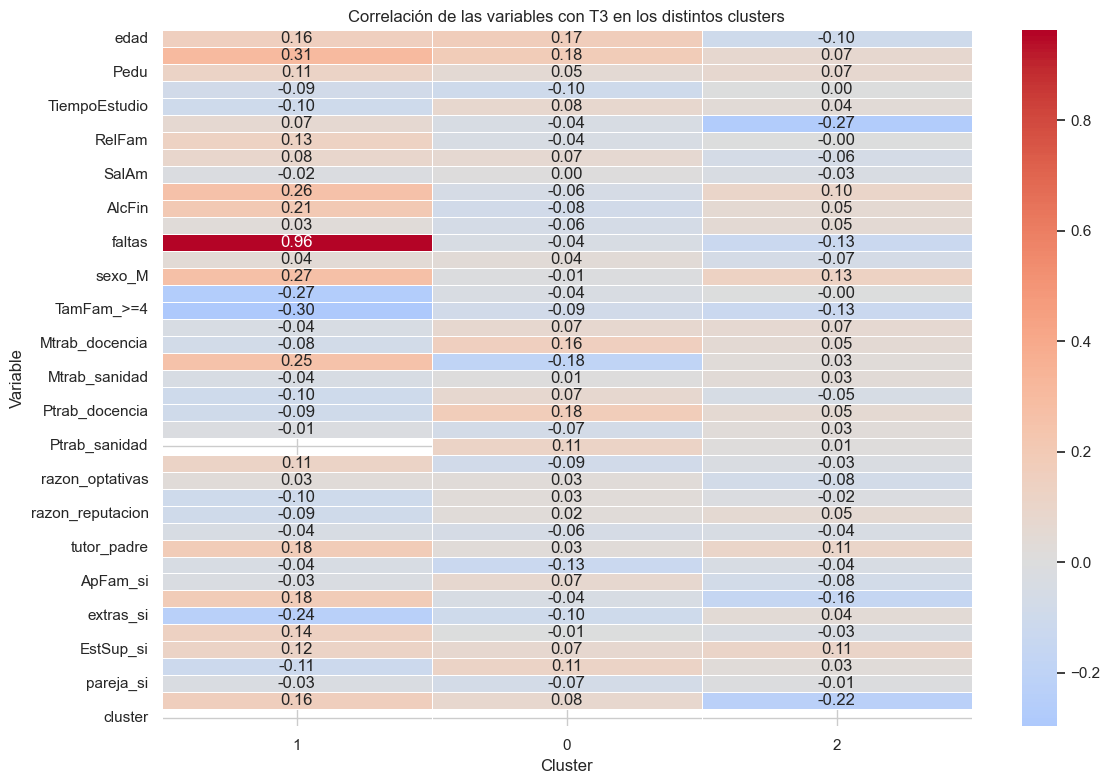

In [32]:
# Calculamos las correlaciones de las variables numéricas con T3 para cada cluster
correlaciones_por_cluster = {}

# Iteramos sobre cada cluster
for cluster in df_clustered['cluster'].unique():
    subset = df_clustered[df_clustered['cluster'] == cluster]
    correlaciones_por_cluster[cluster] = subset.corr()[variable_objetivo].drop(variable_objetivo)

# Convertimos las correlaciones en un DataFrame
df_correlaciones = pd.DataFrame(correlaciones_por_cluster)

# Creamos el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_correlaciones, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlación de las variables con T3 en los distintos clusters")
plt.xlabel("Cluster")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


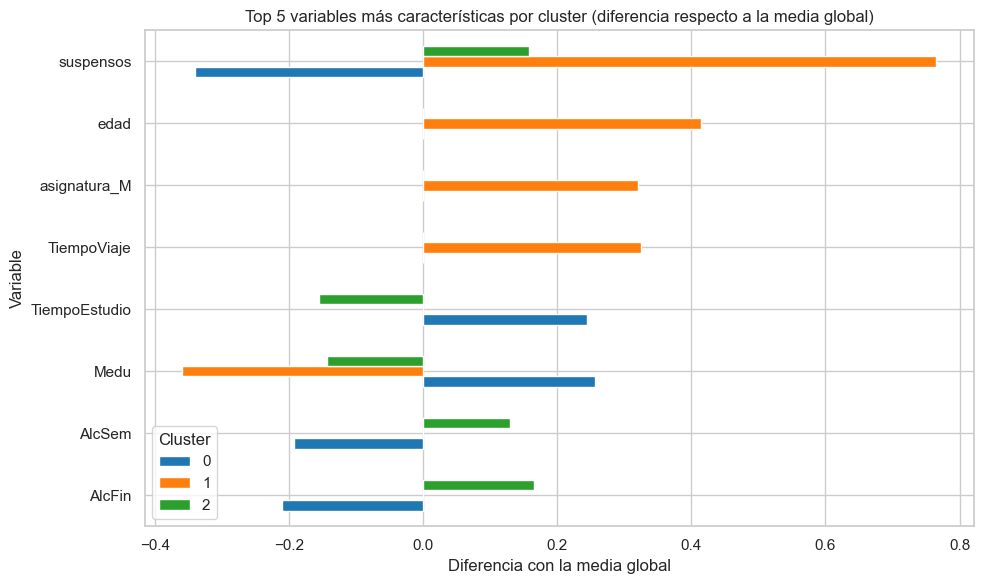

In [33]:
# Calcular media global
media_global = df_clustered.drop(columns="cluster").mean(numeric_only=True)

# Calcular diferencias de cada cluster respecto a la media global
perfil_cluster = df_clustered.drop(columns=[variable_objetivo]).groupby("cluster").mean(numeric_only=True).T
perfil_dif = perfil_cluster.subtract(media_global, axis=0)

# Obtener las top 5 variables más características por cluster
top_vars_por_cluster = {}

for cluster in perfil_dif.columns:
    top_vars = perfil_dif[cluster].abs().sort_values(ascending=False).head(5).index
    top_vars_por_cluster[cluster] = perfil_dif.loc[top_vars, cluster]

# Convertir a DataFrame para plotear
df_top_vars = pd.DataFrame(top_vars_por_cluster)

# Establecer colores usando la paleta 'tab10' para coherencia
cluster_colors = sns.color_palette("tab10", n_colors=3)
color_dict = {i: cluster_colors[i] for i in df_top_vars.columns}

# Pintar gráfico de barras horizontales
ax = df_top_vars.plot(kind='barh', figsize=(10, 6), color=[color_dict[col] for col in df_top_vars.columns])
plt.title("Top 5 variables más características por cluster (diferencia respecto a la media global)")
plt.xlabel("Diferencia con la media global")
plt.ylabel("Variable")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Cluster")
plt.show()


### Análisis de las variables más características por cluster

Este gráfico representa las **5 variables más distintivas** para cada uno de los tres clusters que se habían detectado previamente. Estas variables han sido calculadas como la diferencia entre la media del cluster y la media global del dataset.

Cada variable destaca por ser significativamente **más alta o más baja** respecto al conjunto de alumnos, lo que permite **caracterizar los perfiles** y pensar en **acciones concretas** para mejorar los resultados.

#### Cluster 0 – Estudiantes de Alto Rendimiento

**Variables distintivas:**
- `Medu` (nivel educativo de la madre): más alto que la media
- `TiempoEstudio`: superior a la media
- `AlcFin`, `AlcSem`: consumo de alcohol más bajo
- `suspensos`: significativamente menor

**Interpretación:**
Este grupo está compuesto por estudiantes que presentan:
- Un **entorno familiar más favorable** (madres con mayor nivel educativo).
- **Buenos hábitos de estudio**.
- Estilos de vida más sanos (bajo consumo de alcohol).
- Bajas tasas de suspensos.

**Recomendaciones:**
- **Fomentar el ejemplo familiar**: campañas de sensibilización en centros donde el nivel formativo familiar sea bajo.
- **Refuerzo positivo** de sus hábitos para mantener la motivación.
- Iniciativas de **mentoría o liderazgo educativo** para que estos alumnos puedan inspirar a otros, y no se sientan desmotivados o frustrados.

#### Cluster 1 – Estudiantes en Riesgo Crítico

**Variables distintivas:**
- `suspensos`: extremadamente superior
- `edad`: superior a la media (posible repitencia)
- `TiempoViaje`: más largo
- `asignatura_M`: presencia destacada (hay una clara dificultad en la asignatura de Matemáticas para estos alumnos)
- `Medu`: significativamente menor

**Interpretación:**
Este grupo representa alumnos con **rendimiento académico muy bajo** o nulo, lo que puede estar asociado a:
- **Dificultades estructurales** (lejanía al centro educativo, que desemboca en absentismo).
- **Menor nivel formativo en casa**.
- Problemas en asignaturas clave.
- Posibles repeticiones de curso (edad mayor a la media)

**Recomendaciones y medidas urgentes:**
- **Programas de refuerzo** académico personalizado, haciendo especial hincapié en Matemáticas.
- **Reducción del absentismo** mediante transporte escolar o acuerdos familiares.
- Estrategias de **acompañamiento psicológico y motivacional**.
- Identificar posibles **dificultades específicas de aprendizaje** o desmotivación prolongada.
- Fomentar **aulas de adaptación** o recuperación con recursos especiales, también para incluir a repetidores que se están quedando rezagados.

#### Cluster 2 – Estudiantes con Rendimiento Medio

**Variables distintivas:**
- `AlcFin`, `AlcSem`: valores intermedios (más que Cluster 0, menos que el 1)
- `Medu`: también algo elevado
- `TiempoEstudio`: más bajo que Cluster 0
- `suspensos`: valores moderados

**Interpretación:**
Este grupo se encuentra en un punto intermedio. Tienen capacidad, pero:
- Podrían mejorar su rendimiento ajustando algunos hábitos (estudio, entorno).
- Están **influenciados por factores que aún no les permiten destacar** como el Cluster 0.

**Recomendaciones:**
- **Talleres de técnicas de estudio**, planificación y concentración.
- Fomentar la **autonomía y motivación intrínseca**, tratando de potenciar su interés por las asignaturas.
- Identificar **potencial oculto** mediante tutorías personalizadas.
- Incentivos para el **progreso individual** y evitar la comparación directa con los extremos.

#### Conclusiones Generales

- **El nivel educativo de la familia y los hábitos de estudio** son los pilares clave del éxito académico.
- **El consumo de alcohol** y **los desplazamientos largos** aparecen como factores de riesgo claros.
- Se hace imprescindible una política educativa más **personalizada, flexible y preventiva**.

#### Propuestas transversales

- Programas de **mentoría cruzada** entre clusters (modelo "alumno mentor").
- **Actividades extracurriculares** orientadas a mejorar habilidades sociales y de organización.
- Diagnóstico temprano de **factores de riesgo** para conseguir una intervención temprana.
- Promover el rol de la **familia como agente educativo** activo, que pueda ayudar y guiar al alumno.

